In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import pandas as pd

# Load the Boston housing dataset
df = pd.read_csv('HousingData.csv')
df.rename(columns = {'MEDV':'Price'}, inplace = True) 
df['RAD'] = df['RAD'].astype('float64')
df['TAX'] = df['TAX'].astype('float64')
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [24]:
df['CRIM'].mode()[0]
df['CRIM'] = df['CRIM'].fillna(0.01501)
df.isnull().sum()
df['ZN'] = df['ZN'].fillna(0.0120)
# df['ZN']
df.isnull().sum()
df['INDUS'] = df['INDUS'].fillna(18.1)
# df['INDUS'].mode()[0]
# df.isnull().sum()
df['CHAS'].mode()[0]
df['CHAS'] = df['CHAS'].fillna(0.0)
df['AGE'].mode()[0]
df['AGE'] = df['AGE'].fillna(80.0)
df['LSTAT'].mode()[0]
df['LSTAT'] = df['LSTAT'].fillna(6.36)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [25]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.185549,0.379754,-0.055705,0.410921,-0.220323,0.342014,-0.365909,0.600548,0.559916,0.278227,-0.364913,0.430490,-0.384108
ZN,-0.185549,1.000000,-0.497920,-0.032994,-0.498625,0.312301,-0.535054,0.632437,-0.300069,-0.304390,-0.394633,0.170123,-0.385946,0.362298
INDUS,0.379754,-0.497920,1.000000,0.050288,0.735691,-0.389362,0.615455,-0.687672,0.580946,0.697661,0.372694,-0.344783,0.566693,-0.478199
CHAS,-0.055705,-0.032994,0.050288,1.000000,0.070867,0.106797,0.075467,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.044653,0.183844
NOX,0.410921,-0.498625,0.735691,0.070867,1.000000,-0.302188,0.711363,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.568643,-0.427321
RM,-0.220323,0.312301,-0.389362,0.106797,-0.302188,1.000000,-0.238591,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602263,0.695360
AGE,0.342014,-0.535054,0.615455,0.075467,0.711363,-0.238591,1.000000,-0.723686,0.445559,0.497109,0.261238,-0.268840,0.574001,-0.376203
DIS,-0.365909,0.632437,-0.687672,-0.092318,-0.769230,0.205246,-0.723686,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.476652,0.249929
RAD,0.600548,-0.300069,0.580946,-0.003339,0.611441,-0.209847,0.445559,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.459460,-0.381626
TAX,0.559916,-0.304390,0.697661,-0.035822,0.668023,-0.292048,0.497109,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.516273,-0.468536


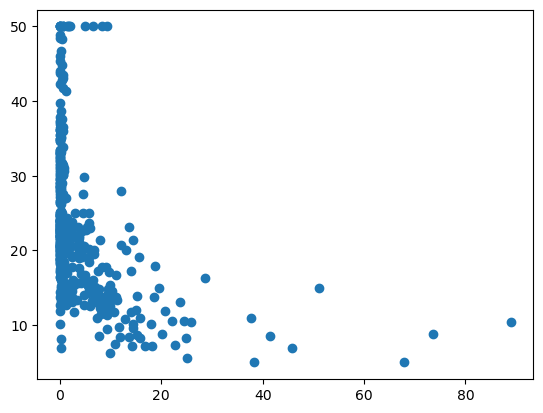

In [26]:
# CRIM is per capita crime rate per town 
# RM is average number of rooms per dwelling 
# Lstat is lower state of population
plt.scatter(df['CRIM'],df['Price'])
plt.show()

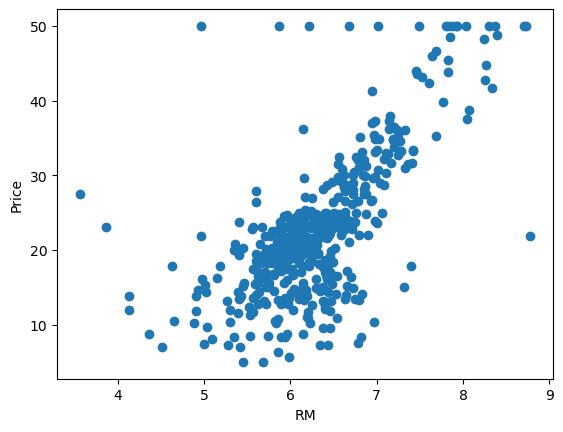

In [27]:
plt.scatter(df['RM'],df['Price'])
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='RM', ylabel='Price'>

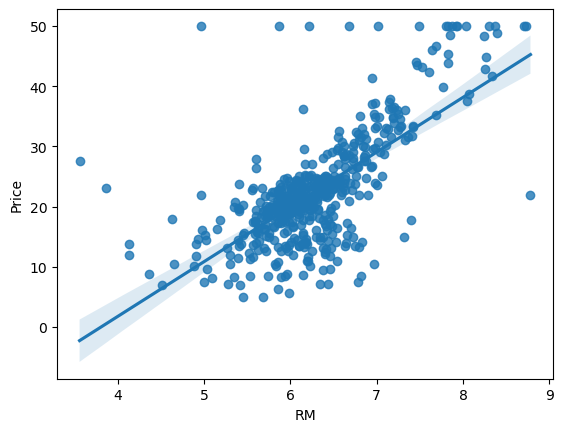

In [28]:
import seaborn as sns 
sns.regplot(x="RM",y="Price",data=df)

<Axes: xlabel='LSTAT', ylabel='Price'>

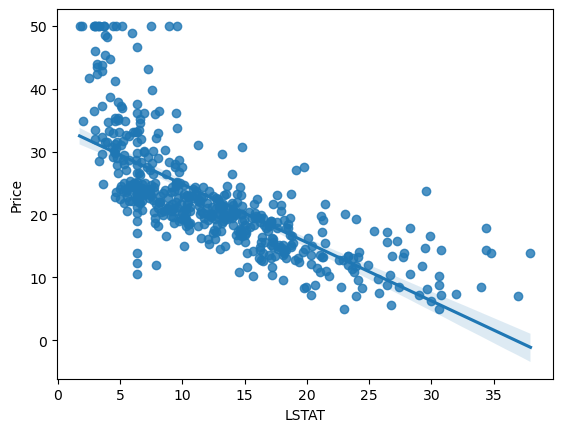

In [29]:
sns.regplot(x="LSTAT",y="Price",data=df)
# As we can clearly see that Lstat is negetivly correlared 

<Axes: xlabel='CHAS', ylabel='Price'>

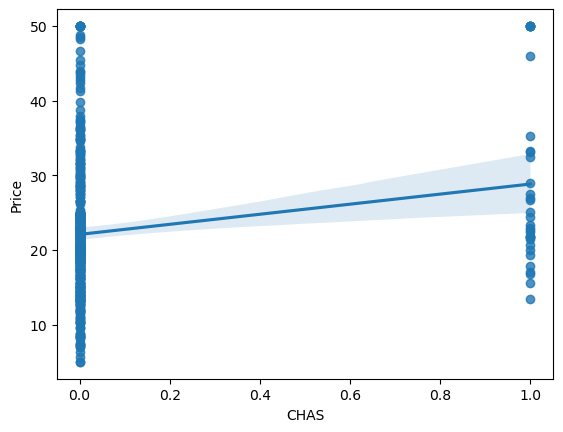

In [30]:
sns.regplot(x="CHAS",y="Price",data=df)

<Axes: xlabel='PTRATIO', ylabel='Price'>

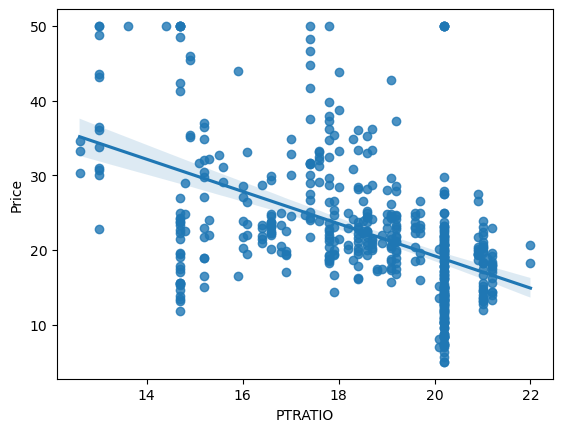

In [31]:
sns.regplot(x="PTRATIO",y="Price",data=df)
# Again a inverse relationship 


In [32]:
y = df.iloc[:,-1]
X= df.iloc[:,:-1]
X
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,6.36
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [33]:
# Standardzize dataset 
# Standardize dataset is used to bring all datapoint to the same scale .
# Its used to come to a global minima 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[-0.39747041, -0.48781031, -1.33426169, ...,  0.18727079,
         0.39651419, -0.99529588],
       [-0.38518012, -0.48781031, -0.19916994, ..., -0.21208981,
         0.3870674 , -0.83211948],
       [-0.38036693, -0.48781031, -0.6485677 , ..., -0.16771641,
         0.42854113, -0.28583327],
       ...,
       [-0.39926327,  3.07161957, -1.35890609, ..., -0.56707702,
         0.35987906, -0.88461972],
       [ 0.94724354, -0.48781031,  0.97361324, ...,  0.8528718 ,
        -2.87841346,  1.56728308],
       [-0.37343952, -0.48781031, -0.40937212, ...,  1.16348561,
        -3.32828832, -0.22623841]])

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [36]:
reg.fit(X_train,y_train)

LinearRegression()

In [37]:
print(reg.coef_)

[-1.05756382  0.74035728  0.00364333  0.95859422 -1.64606643  3.14146901
 -0.62979756 -2.99650586  1.66026737 -1.22074037 -2.04324956  0.97513764
 -3.33549015]


In [38]:
print(reg.intercept_)

23.01581920903955


In [39]:
preds = reg.predict(X_test)

In [40]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: Price, Length: 152, dtype: float64

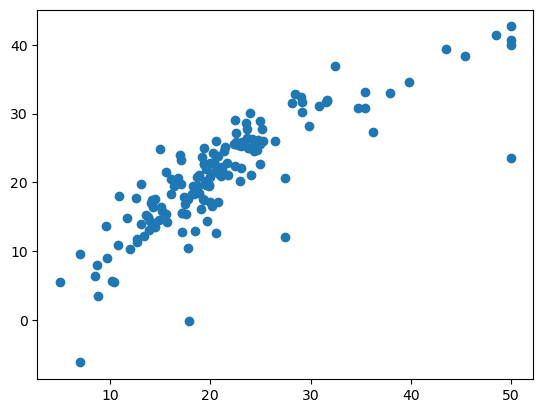

In [41]:
plt.scatter(y_test,preds)

In [42]:
res = y_test - preds
print(res)

173    -4.987187
274    -4.543682
491    -1.611471
72     -2.576000
452    -2.243528
         ...    
441    -6.221986
23      0.981654
225    10.003751
433    -2.050307
447    -5.102892
Name: Price, Length: 152, dtype: float64


C:\Users\Abhi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


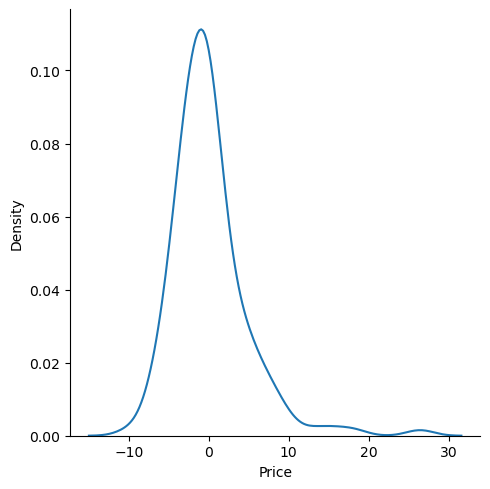

In [43]:
sns.displot(res,kind='kde')
# Distplot basically plots the normal distributions 

In [44]:
preds

array([28.58718673, 36.94368186, 15.21147092, 25.3759996 , 18.3435279 ,
       22.87362377, 17.63570223, 14.40071683, 21.92638789, 20.67154791,
       25.20127793, 18.52246399, -6.19833044, 21.77042429, 18.92399705,
       28.16481888, 19.49924326,  5.6002156 , 40.69361851, 17.02683004,
       27.70542201, 30.18972986, 11.33274172, 25.60299006, 17.37964832,
       15.03175404, 24.26144883, 14.4967033 , 22.80983672, 19.4115458 ,
       22.09578316, 25.06236724, 24.81318681, 17.20275368, 16.13636185,
       17.39118116, 30.77045272, 20.18471667, 24.63093403, 25.63557898,
       14.38883596, 31.59775713, 42.67464883, 17.8519983 , 27.17853767,
       16.41585697, 13.88147297, 26.2955782 , 19.58673138, 30.13748403,
       21.06406547, 33.13726996, 15.86278408, 26.0465932 , 39.4194984 ,
       22.27218871, 18.30977232, 32.84054604, 25.05892373, 12.94188872,
       22.6815308 , 30.86756085, 31.71144028, 16.57472478, 21.14045643,
       17.18638596, 19.81513511, 26.18297363, 31.1028319 , 11.75

In [45]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: Price, Length: 152, dtype: float64

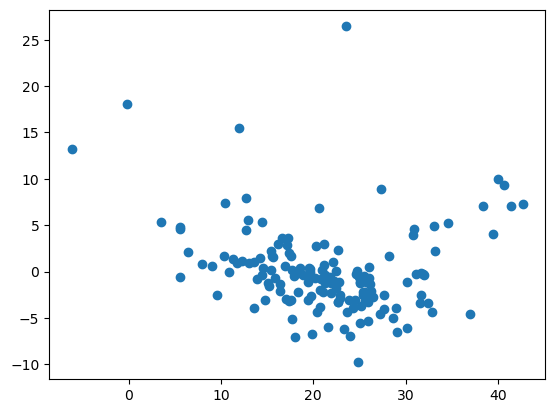

In [46]:
plt.scatter(preds,res)

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_errors

ImportError: cannot import name 'mean_squared_errors' from 'sklearn.metrics' (C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [48]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,preds))
print(mean_squared_error(y_test,preds))

3.168371407893042
22.003247872281126


# R square and adjusted R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [56]:
from sklearn.metrics import r2_score
score=r2_score(y_test,preds)
print(score)

0.70470629753611


In [57]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6768887748402364

In [58]:
boston_data = np.array(([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]]))

In [60]:
boston_data.shape

(1, 13)

In [62]:
reg.predict(scaler.transform(boston_data))

C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.13748403])

In [64]:
import pickle
pickle.dump(reg,open('regmodel.pkl','wb'))

In [65]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [66]:
pickled_model.predict(scaler.transform(boston_data))


C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.13748403])